# Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# References
1) Class material and videos
2) https://github.com/tensorflow/models/tree/master/research/object_detection
3) https://glassboxmedicine.com/2020/01/21/segmentation-u-net-mask-r-cnn-and-medical-applications/

# Load dataset

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
#imgaedata = np.load('Dataset- Images.npy',allow_pickle=True)
imgaedata = np.load('/content/drive/MyDrive/LablFiles/AdvancedVision/Project_1/Dataset- Images.npy',allow_pickle=True)

In [ ]:
len(imgaedata)

409

In [ ]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import random as ran

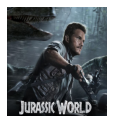

[{'imageHeight': 1096,
  'imageWidth': 1000,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.685807150595883, 'y': 0.24209486166007904},
   {'x': 0.7865655471289275, 'y': 0.43379446640316205}]}]

In [ ]:
n = ran.randint(0,408)
plt.figure(figsize=(500, 2))
Image_n = tf.keras.preprocessing.image.array_to_img(imgaedata[n][0])  
plt.imshow(Image_n, cmap="gray")
plt.axis('off')
plt.show()
imgaedata[n][1]

In [ ]:
#Lets see shape of image 
n = ran.randint(0,408)
imgaedata[n][0].shape

(473, 710, 3)

# Dataset Observations

-> Total no of images in training dataset = 409

1.   Total no of images in the dataset = 409
2.   Many images have moore than one faces (object)
3.   The image data for each picture is in RGB format

# Create features and labels

-Lets store each image from image array to file
-Read other details like class, height, width, xmin,ymin,xmax,ymax and store in dataframe 

In [ ]:
imagePath = '/content/drive/MyDrive/LablFiles/AdvancedVision/Project_1/Project1_images/'
#imagePath = 'Project1_images'

In [ ]:
dflabel = pd.DataFrame(columns={'filename','class','height','width','xmin','ymin','xmax','ymax'})

In [ ]:
validfilecount =0
for i, item in enumerate(imgaedata) :           
    img = item[0]
    validfilecount = validfilecount +1
    filename= str(validfilecount) + '.jpg'    # keep counter of image as file name 
    #filePath = os.path.join(os.getcwd(),imagePath,filename)
    filePath  = imagePath + filename
    #print(filename)
    #print(img.shape)
    #print(filePath)
    if len(img.shape) > 2 and img.shape[2] == 4:
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)   #convert the image from RGBA2RGB
    #Get width, height, xmin,ymin, xmax,ymax
    # This is list..iterate through list
    facecount=0
    for lst in item[1] :
#       print('***',lst)
        facecount= facecount +1
        for key, val in lst.items() :
#           print('===',key,val)
            if (key=='imageWidth') :
                width = val   
                #print('width',width)
            if (key=='imageHeight') :
                height = val
                #print('height',height)
            if (key == 'label') :
                label = val[0]          
            if (key=='points') :    
                lstcount=1
                for ls in val :
#                   print('---',ls)                    
                    for key1,val1 in ls.items() :
                        if (key1=='x' and lstcount <=2) :                        
                            xmin=val1  
                            #print('xmin',xmin)
                        if (key1=='y' and lstcount <=2) :                        
                            ymin=val1       
                            #print('ymin',ymin)
                        if (key1=='x' and lstcount >=3) :                        
                            xmax=val1                
                        if (key1=='y' and lstcount >=3) :                        
                            ymax=val1              
                       
                        lstcount=lstcount+1   
        dflabel = dflabel.append({'filename':filename,'class':label,'height':height,'width':width,'xmin':int(xmin*width),
                                  'ymin':int(ymin*height),'xmax':int(xmax*width),'ymax':int(ymax*height)}, ignore_index=True)                                    

In [ ]:
dflabel.head(20)

,class,xmin,xmax,ymin,height,width,filename,ymax
0,Face,56,112,102,333,650,1.jpg,151
1,Face,379,428,97,333,650,1.jpg,156
2,Face,902,984,162,697,1280,2.jpg,252
3,Face,216,279,12,240,460,3.jpg,80
4,Face,289,343,2,240,460,3.jpg,74
5,Face,297,357,79,291,600,4.jpg,134
6,Face,324,383,65,326,580,5.jpg,123
7,Face,224,284,61,326,580,5.jpg,132
8,Face,100,161,75,326,580,5.jpg,144
9,Face,415,490,65,326,580,5.jpg,135


In [ ]:
dflabel.shape

(1132, 8)

In [ ]:
# validfilecount =0
# for i, item in enumerate(imgaedata) :
    
# #     print(item)
#     #It is found that some elements (image data) is less than 3 dimentional...so ingore such image records 
    
# #     if (len(item[0].shape) < 3) :
# #         continue  
# #     img = array_to_img(item[0]) # using keras APi convert array data into image  
#   # If is found that in some images have 4 dimention i.e. RGBA means Red, Green, Blue, Alpha - Alpha is transparency.  
#   # JPG does not support transparency...so I am converting image to RGB and letting go Alpha
# #     img = img.convert('RGB')    
    
#       #save image on the disk
        
#     img = cv2.imread(item[0])
#     validfilecount = validfilecount +1
#     filename= str(validfilecount) + '.jpg'    # keep counter of image as file name 
# #     filePath  = imagePath + filename   
# #     filePath = os.path.join(os.getcwd(),'GL','SR','1',imagePath,filename)
#     filePath = os.path.join(os.getcwd(),'GL','SR','1',imagePath,filename)
#     print('****',filePath,type(img))
#     if os.path.isfile(filePath)==False:
#         cv2.imwrite(filePath,img)
# #         save_img(filePath,img)
#         ind = i
#         width =0
#         height=0
#         xmin=0
#         ymin=0
#         xmax=0
#         ymax=0
#         label= ''
#       #Get width, height, xmin,ymin, xmax,ymax
#       # This is list..iterate through list
#         facecount=0
#         for lst in item[1] :
            
#             print('***',lst)
#             facecount= facecount +1
#             for key, val in lst.items() :
#                 print('===',key,val)
                               
#                 if (key=='imageWidth') :
#                     width = val        
#                 if (key=='imageHeight') :
#                     height = val
#                 if (key == 'label') :
#                     label = val[0]          
#                 if (key=='points') :    
#                     lstcount=1
                    
#                     for ls in val :  
#                         print('---',ls)
#                         for key1,val1 in ls.items() :
#                             if (key1=='x' and lstcount <=2) :                        
#                                 xmin=val1                
#                             if (key1=='y' and lstcount <=2) :                        
#                                 ymin=val1               
#                             if (key1=='x' and lstcount >=3) :                        
#                                 xmax=val1                
#                             if (key1=='y' and lstcount >=3) :                        
#                                 ymax=val1                              
#                             lstcount=lstcount+1             
#             #Add data into data frame
#         #print(str(filename) + '-' + str(label) + '-' + str(height) + '-' + str(width) + '-' + str(xmin) + '-' + str(ymin) +'-' + str(xmax) +'-'+ str(ymax))    
#             dflabel= dflabel.append({'filename':filename,'class':label,'height':height,'width':width,
#                         'xmin':int(xmin*width),'ymin':int(ymin*height),'xmax':int(xmax*width),'ymax':int(ymax*height)}, ignore_index=True)

In [ ]:
dflabel.columns

Index(['class', 'xmin', 'xmax', 'ymin', 'height', 'width', 'filename', 'ymax'], dtype='object')

In [ ]:
neworder = [0,3,4,1,7,6,5,2]
dflabel= dflabel[dflabel.columns[neworder]]

In [ ]:
dflabel.head(15)

,xmin,class,ymin,filename,width,ymax,xmax,height
0,56,Face,102,1.jpg,650,151,112,333
1,379,Face,97,1.jpg,650,156,428,333
2,902,Face,162,2.jpg,1280,252,984,697
3,216,Face,12,3.jpg,460,80,279,240
4,289,Face,2,3.jpg,460,74,343,240
5,297,Face,79,4.jpg,600,134,357,291
6,324,Face,65,5.jpg,580,123,383,326
7,224,Face,61,5.jpg,580,132,284,326
8,100,Face,75,5.jpg,580,144,161,326
9,415,Face,65,5.jpg,580,135,490,326


In [ ]:
#Lets save the dataframe
import pickle

In [ ]:
#dflabel.to_pickle(os.path.join(os.getcwd(),'labelfile.pickle'))
dflabel.to_pickle('/content/drive/MyDrive/LablFiles/AdvancedVision/Project_1/labelfile.pickle')

In [ ]:
#dflabel = pd.read_pickle(os.path.join(os.getcwd(),'labelfile.pickle'))
dflabel = pd.read_pickle('/content/drive/MyDrive/LablFiles/AdvancedVision/Project_1/labelfile.pickle')

In [ ]:
dflabel['class'].unique()

array(['Face'], dtype=object)

In [ ]:
#Lets label classes
from sklearn import preprocessing

In [ ]:
#Label Encode class and add a 'label' column to the dataframe
lblenc = preprocessing.LabelEncoder()
dflabel['label'] = lblenc.fit_transform(dflabel['class'])
dflabel.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,1.jpg,650,333,Face,56,102,112,151,0
1,1.jpg,650,333,Face,379,97,428,156,0
2,2.jpg,1280,697,Face,902,162,984,252,0
3,3.jpg,460,240,Face,216,12,279,80,0
4,3.jpg,460,240,Face,289,2,343,74,0


In [ ]:
dflabel['label'] = dflabel['label'] + 1

In [ ]:
dflabel['width'] = dflabel['width'].astype(int)
dflabel['height'] = dflabel['height'].astype(int)
dflabel['xmin'] = dflabel['xmin'].astype(int)
dflabel['ymin'] = dflabel['ymin'].astype(int)
dflabel['xmax'] = dflabel['xmax'].astype(int)
dflabel['ymax'] = dflabel['ymax'].astype(int)

In [ ]:
dflabel.dtypes

filename    object
width        int64
height       int64
class       object
xmin         int64
ymin         int64
xmax         int64
ymax         int64
label        int64
dtype: object

In [ ]:
os.getcwd()

'C:\\GL\\SR\\1'

In [ ]:
#imagePath = os.path.join(os.getcwd(),'Project1_images')
imagePath = '/content/drive/MyDrive/LablFiles/AdvancedVision/Project_1/Project1_images/'

Visualise pictures

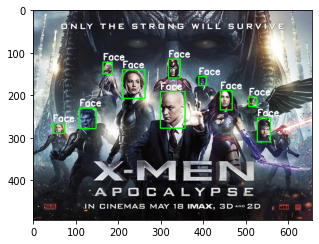

In [ ]:
#Pickup a random image number
img_num = np.random.randint(0, dflabel.shape[0])
#Read the image
img_file = dflabel.loc[img_num,'filename']
img = cv2.imread(imagePath + '/' + img_file)
#Find all rows which have same file name
rows_with_file = dflabel[dflabel['filename'] == img_file].index.tolist()
#Draw rectangle(s) as per bounding box information
for i in rows_with_file:
    #Get bounding box
    xmin, ymin, xmax, ymax = dflabel.loc[i, ['xmin', 'ymin', 'xmax', 'ymax']]        
    #Get Label
    label = dflabel.loc[i, 'class']
    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #cv2.rectangle(img, (int(xmin),int(ymin)), (int(xmax), int(ymax)), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(int(xmin), int(ymin)-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

# Mobilenet + UNet Model

In [ ]:
os.chdir("/content/drive/MyDrive/LablFiles/AdvancedVision/Project_1/")

In [ ]:
data = np.load('Dataset- Images.npy',allow_pickle=True)

In [ ]:
IMAGE_WIDTH,IMAGE_HEIGHT  = 224 , 224

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
        img = img[:, :, :3]
    except:
        continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
X.shape

(409, 224, 224, 3)

In [ ]:
masks.shape

(409, 224, 224)

In [ ]:
X_train = X[:400]
y_train = masks[:400]

In [ ]:
X_test = X[400:]
y_test = masks[400:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


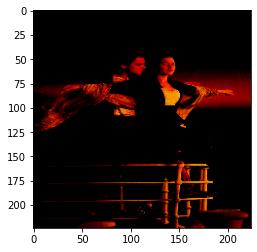

In [ ]:
import matplotlib.pyplot as plt
# n = 10   
n = np.random.randint(0, 408)
# print("Image array:", X_train[n])
plt.imshow(X_train[n])

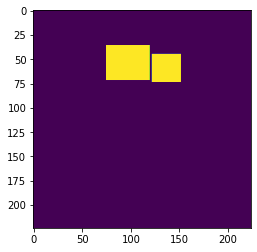

In [ ]:
plt.imshow(masks[n])

In [ ]:
X_train.shape[0]

400

In [ ]:
y_train.shape[0]

400

In [ ]:
len(data)

409

In [ ]:
def bat() :
  for i in range(0,23,4) :
    yield i

In [ ]:
a = bat()

In [ ]:
type(print(next(a)))

0


NoneType

In [ ]:
def BatchGen1(max,batch_size=4) :
    start = next(a)  
    end = start + batch_size
    if end > max :
      end = max
    ids = np.array(list(range(start,end)))
    return ids

In [ ]:
print(next(a))

4


In [ ]:
a

array([0, 1, 2, 3])

In [ ]:
x = np.array(list(range(1,5)))

In [ ]:
type(x)

numpy.ndarray

In [ ]:
def BatchGenerator(data,batch_size=8):
    while True:
        #Create random indexes
        ids = np.random.randint(0, data.shape[0], batch_size)
        #array for X and y
        X1 = np.zeros((batch_size, IMAGE_HEIGHT, IMAGE_WIDTH,3))
        #array for mask 
        #y1 = np.zeros((batch_size, img_size, img_size,3,num_classes))
        y1 = np.zeros((batch_size, IMAGE_HEIGHT, IMAGE_WIDTH))        
        #for i in range(len(ids)):
        j=0
        for i in ids:
            X1[j] = X[i].astype('uint8')
            #Read mask            
            y1[j] = masks[i].astype('uint8')
            j=j+1
            #y1[i] = tf.keras.utils.to_categorical(mask, num_classes=num_classes)
        yield X1, y1

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

In [ ]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable
  
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    #print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    #print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    #print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    #print(x.shape)
    x = UpSampling2D()(x)
    #print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    #x = Conv2D(1, kernel_size=1, activation="softmax")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    #print(x.shape)

    return Model(inputs=model.input, outputs=x)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model3 = create_model()

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

In [ ]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [ ]:
train_generator = BatchGenerator(X_train,batch_size=8)
test_generator = BatchGenerator(X_test, batch_size=8)

In [ ]:
#model3.compile( optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])
#sgd = tf.keras.optimizers.SGD(learning_rate=0.000001, decay=1e-6, momentum=0.7)
model3.compile( optimizer='adam' , loss=loss, metrics=[dice_coefficient])
#model3.compile( optimizer=sgd , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True, save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
model3.fit(train_generator,
          steps_per_epoch=X_train.shape[0]//8, 
          validation_data=test_generator, 
          validation_steps=X_test.shape[0]//8, 
          callbacks=[model_checkpoint,reduce_lr, stop],
          epochs=5)

Epoch 1/5
50/50 [==============================] - 389s 8s/step - loss: 1.6341 - dice_coefficient: 0.3605 - val_loss: 1.8690 - val_dice_coefficient: 0.1803

Epoch 00001: loss improved from inf to 1.63413, saving model to model-1.63.h5
Epoch 2/5
50/50 [==============================] - 390s 8s/step - loss: 1.3598 - dice_coefficient: 0.4254 - val_loss: 1.3094 - val_dice_coefficient: 0.4152

Epoch 00002: loss improved from 1.63413 to 1.35981, saving model to model-1.36.h5
Epoch 3/5
50/50 [==============================] - 387s 8s/step - loss: 1.1869 - dice_coefficient: 0.4451 - val_loss: 2.9329 - val_dice_coefficient: 0.0961

Epoch 00003: loss improved from 1.35981 to 1.18695, saving model to model-1.19.h5
Epoch 4/5
50/50 [==============================] - 399s 8s/step - loss: 1.0566 - dice_coefficient: 0.4913 - val_loss: 0.7274 - val_dice_coefficient: 0.5871

Epoch 00004: loss improved from 1.18695 to 1.05659, saving model to model-1.06.h5
Epoch 5/5
50/50 [==============================]

# Prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


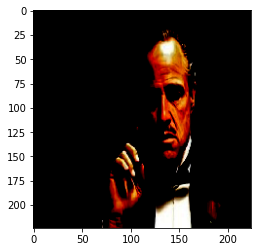

In [ ]:
m = 10
plt.imshow(X_train[m])

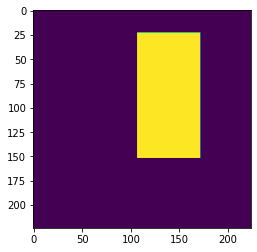

In [ ]:
plt.imshow(masks[m])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


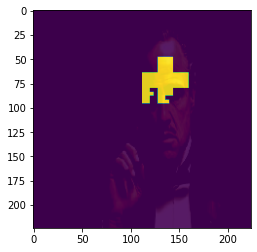

In [ ]:
pred_mask = cv2.resize(1.0 * (model3.predict(x=np.array([X_train[m]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT)) 
plt.imshow(X_train[m])
plt.imshow(pred_mask, alpha=0.9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


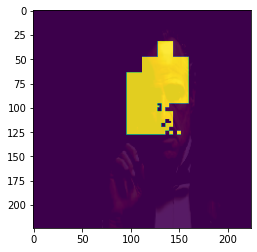

In [ ]:
pred_mask = cv2.resize(1.0 * (model3.predict(x=np.array([X_train[m]]))[0] > 0.1), (IMAGE_WIDTH, IMAGE_HEIGHT)) 
plt.imshow(X_train[m])
plt.imshow(pred_mask, alpha=0.9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


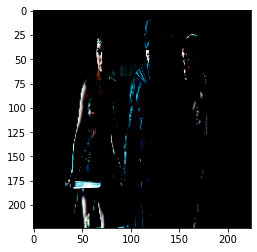

In [ ]:
m = 15
plt.imshow(X_train[m])

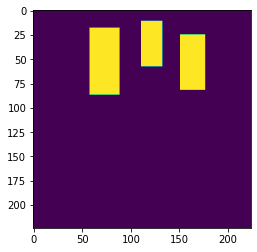

In [ ]:
plt.imshow(masks[m])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


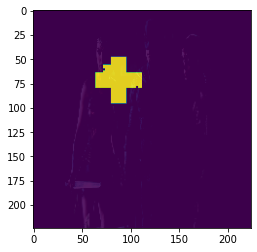

In [ ]:
pred_mask = cv2.resize(1.0 * (model3.predict(x=np.array([X_train[m]]))[0] > 0.2), (IMAGE_WIDTH, IMAGE_HEIGHT)) 
plt.imshow(X_train[m])
plt.imshow(pred_mask, alpha=0.9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


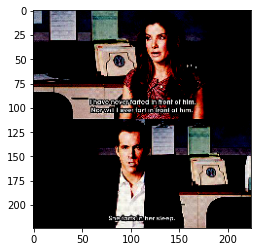

In [ ]:
m = 5
plt.imshow(X_train[m])

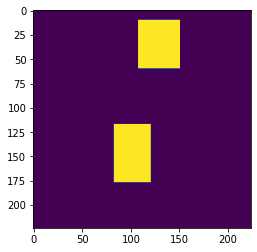

In [ ]:
plt.imshow(masks[m])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


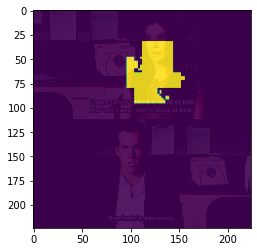

In [ ]:
pred_mask = cv2.resize(1.0 * (model3.predict(x=np.array([X_train[m]]))[0] > 0.1), (IMAGE_WIDTH, IMAGE_HEIGHT)) 
plt.imshow(X_train[m])
plt.imshow(pred_mask, alpha=0.9)